- meta data
- data about data
- unlikely to change once established
- use existing or create own ones
- implicitly
    - _abstract_
    - _public_
- to use an annotation _all required values must be provided_
- **annotations can't be extended**

### Retention Policy
- can be _retained_ (bewahrt) at different levels = _RetentionPolicy_
    - `SOURCE`
        - present at source code
        - discared/ ignored by the compiler
    - `CLASS`
        - retained by compiler
        - ignored by JVM
        - rarely used
    - `RUNTIME`
        - retained by JVM
        - readable at runtime and can be used via reflection

### Targets
- default: _If an @Target meta-annotation is not present on an annotation type T , then an annotation of type T may be written as a modifier for any declaration except a type parameter declaration._
- applicable to different targets/ _declarations_
    - `ANNOTATION_TYPE`
    - `CONSTRUCTOR`
    - `FIELD`  (incl. enum constants)
    - `LOCAL_VARIABLE`
    - `METHOD`
    - `MODULE`
    - `PACKAGE`
    - `PARAMETER`
    - `TYPE` (class, interface (incl. annotation type) or enum 
    - `TYPE_PARAMETER`
    - `TYPE_USE`
        - can be used anywhere there is a Java type
        - Examples:
            - `@Ano public class A extends @Ano B`
            - `new @Ano B()`
            - `String a = (@Ano String) getValue()`


In [15]:
import java.lang.annotation.*;
import java.util.stream.*;

In [2]:
@Retention(RetentionPolicy.RUNTIME)  // <-- otherwise it is not visiable at runtime (reflection)
@interface MySimpleAnnotation {
    String name();
    String street() default "unknown";
}

@MySimpleAnnotation(name = "Petra")
class MySimpleClass {}

MySimpleClass.class.getAnnotations()[0]

@REPL.$JShell$14$MySimpleAnnotation(street="unknown", name="Petra")

In [3]:
MySimpleClass.class.getAnnotations()[0].annotationType()

interface REPL.$JShell$14$MySimpleAnnotation

### Default Must not be null

In [21]:
@Retention(RetentionPolicy.RUNTIME)
@interface MySimpleAnnotation {
    String street() default null;   // <--- must be non-null
}

CompilationException: 

### Constants
- are implicitly
    - public
    - static
    - final
- can be accessed from outside the annotation

In [27]:
@interface A {
    final int constant1 = 1;
    public static final String constant2 = "wuff";
    static String constant3 = "miau";
    long constant4 = 42L;
}
System.out.println(A.constant1);
System.out.println(A.constant2);
System.out.println(A.constant3);
System.out.println(A.constant4);

1
wuff
miau
42


### Trickery - Default Value

In [17]:
@Retention(RetentionPolicy.RUNTIME)
@Target(ElementType.TYPE_USE)
@interface A {
    String value();
    String other() default "wuff";
}

// setting "value" without name is only possible if no other value is set
@A("miau", other="hühh")
class X {}

CompilationException: 

In [18]:
@A(value="muh", other="puh")
class X {
    @A(value="muh")
    String name;
    
    @A("bark")
    Integer ronny;
}

### Trickery - element name only optional for 'value'

In [30]:
public @interface Driver {
    int[] directions();    // <---- change this to 'value' to let it compile
    String wuff() default "";
}

@Driver(1)
class X {}

CompilationException: 

### Repeatable Annotations

In [20]:
// definition order seems to matter

@Retention(RetentionPolicy.RUNTIME)
@Target({ElementType.TYPE})
@Repeatable(MyAnnotations.class)  // <-- allows this annotation to be used multiple times (multiple lines)
public @interface MyAnnotation {
    String value() default "Peter";  // <-- "value" can be used if it is the only value in the annotation,
                                     //     then no name needs to be specified (see below)      
}

@Retention(RetentionPolicy.RUNTIME)
@Target({ElementType.TYPE})
public @interface MyAnnotations {
    MyAnnotation[] value();  // collect the stacked annotations. name "value" is important !
}


@MyAnnotations({
    @MyAnnotation,
    @MyAnnotation("Ronny"),
    @MyAnnotation(value="Jonny")
})
class OtherClass {}


Stream.of(OtherClass.class.getAnnotationsByType(MyAnnotation.class))
    .forEach(t -> System.out.println(t.value()));

Peter
Ronny
Jonny


## Default Values For Value Array

In [6]:
@Retention(RetentionPolicy.RUNTIME)
@Target({ElementType.TYPE})
public @interface MyOtherAnnotation {
    String[] value() default {"Ronny"};
}

In [7]:
@MyOtherAnnotation   // use the default
class OtherClass {}
OtherClass.class.getAnnotations()[0]

@REPL.$JShell$19$MyOtherAnnotation(value={"Ronny"})

In [8]:
@MyOtherAnnotation("Petra")    // set the first element of the array, simple form
class OtherClass {}
OtherClass.class.getAnnotations()[0]

@REPL.$JShell$19$MyOtherAnnotation(value={"Petra"})

In [9]:
@MyOtherAnnotation({"Petra"})    // set the first element of the array,  kind of in the middle
class OtherClass {}
OtherClass.class.getAnnotations()[0]

@REPL.$JShell$19$MyOtherAnnotation(value={"Petra"})

In [10]:
@MyOtherAnnotation(value = {"Petra"})   // set first element of the array, explicit form
class OtherClass {}
OtherClass.class.getAnnotations()[0]

@REPL.$JShell$19$MyOtherAnnotation(value={"Petra"})

### Attributes
- possible types
    - primitive
    - String
    - Class
    - Enum
    - Annotation
    - An array of any above
    

In [11]:
// only primitive is allowed
@Retention(RetentionPolicy.RUNTIME)
@interface MySimpleAnnotation {
    Integer someNumber();
}

CompilationException: 

In [12]:
@Retention(RetentionPolicy.RUNTIME)
@interface AnnotationA {
    int someNumber();
}

@Retention(RetentionPolicy.RUNTIME)
@interface AnnotationB {
    // an other annotation can be attribute
    AnnotationA a() default @AnnotationA(someNumber=1);
}

In [13]:
@Retention(RetentionPolicy.RUNTIME)
@interface MySimpleAnnotation {
    Class value();
}

// a class can be an attribute - ! not an object !
@MySimpleAnnotation(String.class)
class A {}

### Enum Parameter Example

In [25]:
enum Color {GREEN, BLUE}

@interface MyAnnotation {
    Color color();
}

@MyAnnotation(color=Color.BLUE)
class A {}

## Documenting Annotation Usage
- when an annotation is used, it is not contained in the documentation by default
- `@Documented` annotation is used by `javadoc` to include this info in the generated documentation
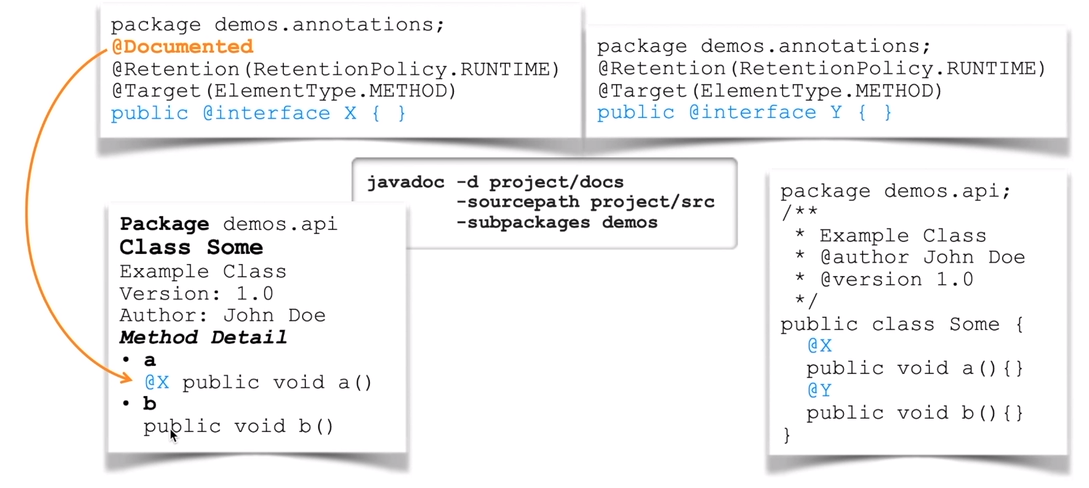

- Example
    - annotation `X` is marked with `@Documentend`
    - annotation `Y` is not
    - source of `Some.java` is left
    - generated JavaDoc is right
    - usage of annotation `@X` is included in JavaDoc
    - annotation `@Y` is not contained in generated output

### Trickery - Inner Annotions Are Possible

In [14]:
class Outer {

    @Retention(RetentionPolicy.RUNTIME)    // defining inner annotation
    @Target({ElementType.TYPE})
    public @interface MyOtherAnnotation {
        String value() default "inner annotation";

    }
    
    @MyOtherAnnotation                     // using inner annotation
    class Inner {}
} 

In [15]:
Outer.class.getDeclaredClasses()[0].getAnnotations()[0]

@REPL.$JShell$28$Outer$MyOtherAnnotation(value="inner annotation")

## Existing Annotations
- validate design
- Does the code I am writing match my intention?
### FunctionalInterface
- Java language spec: https://docs.oracle.com/javase/specs/jls/se8/html/jls-9.html#jls-9.8

```java
/**
 * An informative annotation type used to indicate that an interface
 * type declaration is intended to be a <i>functional interface</i> as
 * defined by the Java Language Specification.
 *
 * ...
 *
 * <p>Note that instances of functional interfaces can be created with
 * lambda expressions, method references, or constructor references.
 *
 * ...
 * <p>However, the compiler will treat any interface meeting the
 * definition of a functional interface as a functional interface
 * regardless of whether or not a {@code FunctionalInterface}
 * annotation is present on the interface declaration.
 * */
@Documented
@Retention(RetentionPolicy.RUNTIME)
@Target(ElementType.TYPE)
public @interface FunctionalInterface {}
```
- only one abstract method
- annotation prevents interface from compiling if rule is broken


### Override
```java
/**
 * Indicates that a method declaration is intended to override a
 * method declaration in a supertype. If a method is annotated with
 * this annotation type compilers are required to generate an error
 * message unless at least one of the following conditions hold:
 *
 * <ul><li>
 * The method does override or implement a method declared in a
 * supertype.
 * </li><li>
 * The method has a signature that is override-equivalent to that of
 * any public method declared in {@linkplain Object}.
 * </li></ul>
 *
 */
@Target(ElementType.METHOD)
@Retention(RetentionPolicy.SOURCE)
public @interface Override {
}
```
- subclasses must match signature of parent classed
- `@Override` prevents from compiling when rule is broken


### Inherited
- class `B` also posseses `MyAnon`
- an annotation which is automatically inherited to child classes

In [20]:
@Inherited 
public @interface MyAnon {}

@MyAnon
public class A {}

public class B extends A {}

### Deprecated
- `@Deprecated` annotation != `@deprecated` Javadoc tag
```java
/**
 * A program element annotated &#64;Deprecated is one that programmers
 * are discouraged from using, typically because it is dangerous,
 * or because a better alternative exists.  Compilers warn when a
 * deprecated program element is used or overridden in non-deprecated code.
 */
@Documented
@Retention(RetentionPolicy.RUNTIME)
@Target({ElementType.CONSTRUCTOR, ElementType.FIELD, ElementType.LOCAL_VARIABLE, ElementType.METHOD, ElementType.PACKAGE, ElementType.MODULE, ElementType.PARAMETER, ElementType.TYPE})
public @interface Deprecated {
    String since() default "";

    boolean forRemoval() default false;
}
```
- Attributes:
    - `since`- version after which the code should not be used
    - `forRemoval` (boolean)
        - `true` - intend to remove the code in the future
        - `false` - use discouraged but currently no intend to remove it
- documentation should describe 
    - reason
    - alternative API
    - in Javadoc the `@deprecated` tag can be used
    
<img src=attachment:image.png width=500></img>

### SupressWarnings

```java
/**
 * Indicates that the named compiler warnings should be suppressed in the
 * annotated element (and in all program elements contained in the annotated
 * element).  Note that the set of warnings suppressed in a given element is
 * a superset of the warnings suppressed in all containing elements.  For
 * example, if you annotate a class to suppress one warning and annotate a
 * method to suppress another, both warnings will be suppressed in the method.
 *
 * <p>As a matter of style, programmers should always use this annotation
 * on the most deeply nested element where it is effective.  If you want to
 * suppress a warning in a particular method, you should annotate that
 * method rather than its class.
 */
@Target({TYPE, FIELD, METHOD, PARAMETER, CONSTRUCTOR, LOCAL_VARIABLE})
@Retention(RetentionPolicy.SOURCE)
public @interface SuppressWarnings {
    /**
     * The set of warnings that are to be suppressed by the compiler in the
     * annotated element.  Duplicate names are permitted.  The second and
     * successive occurrences of a name are ignored.  The presence of
     * unrecognized warning names is <i>not</i> an error: Compilers must
     * ignore any warning names they do not recognize.  They are, however,
     * free to emit a warning if an annotation contains an unrecognized
     * warning name.
     *
     * <p> The string {@code "unchecked"} is used to suppress
     * unchecked warnings. Compiler vendors should document the
     * additional warning names they support in conjunction with this
     * annotation type. They are encouraged to cooperate to ensure
     * that the same names work across multiple compilers.
     * @return the set of warnings to be suppressed
     */
    String[] value();
}
```
- tell the compiler to shut up
- "unchecked" warning 
    - usage of raw-type
    - compiler can't perform safety check on raw object
    - indicated potential heap pollution ?
    - non-parameterized (raw) object may allow values that contradict parameterized (generic) type
- "deprecated" warning - usage of out-of-date API

##### Example - Suppress Deprectation Warning
<img src=attachment:image.png width=800></img>
- `ProductManager.find()` returns list of raw objects
- could be also somethings else then `Product`
- would lead to a runtime error:

### Heap Pollution
- placing other types into heap like expected by the caller
- e.g. Integer instead of String:

In [17]:
// ! returning raw type
List getStrings() {
    return List.of(
    "aa", 
    1   // 1 is autoboxed
    );}

List<String> s = getStrings();
s.forEach(it -> System.out.println(it.toUpperCase()));

AA


EvalException: class java.lang.Integer cannot be cast to class java.lang.String (java.lang.Integer and java.lang.String are in module java.base of loader 'bootstrap')

### Var-Args and Heap Pollution
- interplay between array (no generics support) and an generic type (like _List<String>_)
- array of objects allow adding of elements that are not of a type expected by a generic declaration
- `@SafeVarargs` 
    - disables heap-pollution warning
    - tells compiler "I ensure that this code does not cause heap-pollution"
    - only allowed if the method containing the vararg can't be overrriden
    - method **must be marked with one of the following**:
        - `static`
        - `final`
        - `private`
    
Note: Covariant Return Type: https://en.wikipedia.org/wiki/Covariant_return_type    

In [18]:
// suppress heap-pollution warning "I gurantee that the array type stays unchanged"
// "final" or "private" required to maintain safety guarantee
@SafeVarargs
final void some(List<String>... lists) {
    
    // possible heap pollution 
    // - array primitiv does not support generices
    // - we make it Object here
    // Object[] objectArray = lists;
    
    // gives runtime error -> ClassCastException like above
    // objectArray[0] = List.of(1, 2);
    
    for (List<String> list : lists) {
        list.forEach(System.out::println);
    }
}

// compiler checks that the list contains really strings
some(
    List.of("AA", "BB"),
    // List.of(1, 2),   // gives compile error (incompatible type)
    List.of("CC", "DD")
);


AA
BB
CC
DD


### Trickery - SafeVarargs requirements must be met

In [40]:
class A {
    @SafeVarargs
    // method must private or final
    void some(List<String>... myList) {}
}

CompilationException: 

In [41]:
class A {
    @SafeVarargs
    // method must have vargs parameter
    final void some(List<String> myList) {}
}

CompilationException: 